In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [3]:
G1 = nx.read_gpickle("Data/Graphs/G1.gpickle")
G2 = nx.read_gpickle("Data/Graphs/G2.gpickle")

## 2. Bow-tie Decomposition

In [7]:
import sys
sys.path.append("./Modules")

import Data_Relevant as dr

In [8]:
dr.within_role(G1); dr.across_role(G1)
G1.nodes[1]

{'polarity': 'neutral',
 'fan_size': 233,
 'within_role': 'OTHERS',
 'infomap_comm': '0',
 'across_role': 'OUT'}

In [9]:
dr.within_role(G2); dr.across_role(G2)
G2.nodes[1]

{'polarity': 'neutral',
 'fan_size': 233,
 'within_role': 'OTHERS',
 'infomap_comm': '0',
 'across_role': 'OUT'}

In [10]:
nx.write_gpickle(G1, "Data/Graphs/G1_bt.gpickle")
nx.write_gpickle(G2, "Data/Graphs/G2_bt.gpickle")

In [4]:
def get_bowtie_role(G, bowtie):
    S, IN, OUT, TUBES, INTENDRILS, OUTTENDRILS, OTHER, UNASSIGNED = [], [], [], [], [], [], [], []
    
    for node in G.nodes:
        role = G.nodes[node][bowtie]
        if role == 'S':
            S.append(node)
        elif role == 'IN':
            IN.append(node)
        elif role == 'OUT':
            OUT.append(node)
        elif role == 'TUBES':
            TUBES.append(node)
        elif role == 'INTENDRILS':
            INTENDRILS.append(node)
        elif role == 'OUTTENDRILS':
            OUTTENDRILS.append(node)
        elif role == 'OTHERS':
            OTHER.append(node)
        else:
            UNASSIGNED.append(node)
    
    if bowtie == 'within_role':
        return S, IN, OUT, TUBES, INTENDRILS, OUTTENDRILS, OTHER
    else:
        return S, IN, OUT, TUBES, INTENDRILS, OUTTENDRILS, OTHER, UNASSIGNED

## 2.1 Within-group

In [11]:
S_within1, IN_within1, OUT_within1, TUBES_within1, INTENDRILS_within1, OUTENDRILS_within1, OTHER_within1 = get_bowtie_role(G1, 'within_role')
S_within2, IN_within2, OUT_within2, TUBES_within2, INTENDRILS_within2, OUTENDRILS_within2, OTHER_within2 = get_bowtie_role(G2, 'within_role')

In [12]:
def merge_two_dicts(x, y):
    """Given two dictionaries, merge them into a new dict as a shallow copy."""
    z = x.copy()
    z.update(y)
    return z

In [13]:
dict1 = {}
counter = 0; v_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
for key_list in S_within1, IN_within1, OUT_within1, TUBES_within1, INTENDRILS_within1, OUTENDRILS_within1, OTHER_within1:
    update_dict = dict(zip(key_list, [v_list[counter]]*len(key_list)))
    dict1 = merge_two_dicts(dict1, update_dict)
    counter += 1

In [14]:
dict2 = {}
counter = 0; v_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
for key_list in S_within2, IN_within2, OUT_within2, TUBES_within2, INTENDRILS_within2, OUTENDRILS_within2, OTHER_within2:
    update_dict = dict(zip(key_list, [v_list[counter]]*len(key_list)))
    dict2 = merge_two_dicts(dict2, update_dict)
    counter += 1

In [15]:
cpd_dict = {}; counter = 0
for node in G1.nodes:
    cpd_dict.update({counter: [dict1[node], dict2[node]]})
    counter += 1

- **AntiVax**

In [66]:
index = np.arange(0, len(G1.nodes),1)
cpd_dict_anti = {k: cpd_dict[k] for k in index[644:(501+644)]}
df = pd.DataFrame.from_dict(cpd_dict_anti, orient='index')

In [67]:
def check_component(cpd_dict):
    print(set(np.array(list(cpd_dict.values()))[:,0]))
    print(set(np.array(list(cpd_dict.values()))[:,1]))

In [68]:
check_component(cpd_dict_anti)

{'OTHERS', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'OUT'}
{'OTHERS', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'OUT'}


In [69]:
def check_consistency(cpd_dict):
    counter = 0
    for k,v in cpd_dict.items():
        if v[0] == v[1]:
            counter += 1
    print(counter/len(cpd_dict))

In [70]:
check_consistency(cpd_dict_anti)

0.9520958083832335


In [71]:
def component_percentage(role_list):
    name_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']
    count = []
    for name in name_list:
        count.append((role_list == name).sum())
        
    count = np.array(count)
    percentage = count / np.sum(count)
    return percentage

In [72]:
role_list1 = np.array(list(cpd_dict_anti.values()))[:,0]
component_percentage(role_list1)

array([0.46506986, 0.03193613, 0.39520958, 0.        , 0.01197605,
       0.00598802, 0.08982036, 0.        ])

In [73]:
role_list2 = np.array(list(cpd_dict_anti.values()))[:,1]
component_percentage(role_list2)

array([0.46307385, 0.02994012, 0.37325349, 0.        , 0.01397206,
       0.00399202, 0.11576846, 0.        ])

In [74]:
from pysankey import sankey

 The following arguments are deprecated and should be removed: figureName in sankey()


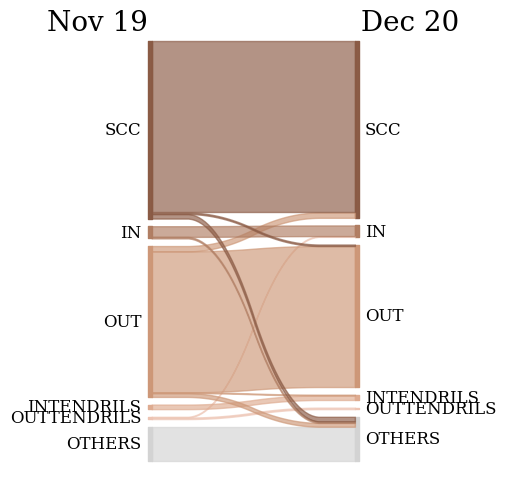

In [76]:
labels = ['SCC', 'IN', 'OUT', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#8a5a44",
    "IN": "#b07d62",
    "OUT": "#cd9777",
    #"TUBES": "#e8ac65",
    "INTENDRILS": "#deab90",
    "OUTTENDRILS": "#edc4b3",
    "OTHERS": "lightgrey",
    
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    df[0], df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/role_within_anti'
)
#sankey.finish()
plt.title('Nov 19                        Dec 20', fontsize = 20, y = 0.96)
plt.show() # to display

- **ProVax**

In [78]:
cpd_dict_pro = {k: cpd_dict[k] for k in index[(644+501):]}
df = pd.DataFrame.from_dict(cpd_dict_pro, orient='index')

In [79]:
check_component(cpd_dict_pro)

{'OTHERS', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'TUBES', 'OUT'}
{'OTHERS', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'TUBES', 'OUT'}


In [80]:
check_consistency(cpd_dict_pro)

0.981042654028436


In [81]:
role_list1 = np.array(list(cpd_dict_pro.values()))[:,0]
component_percentage(role_list1)

array([0.38862559, 0.07109005, 0.25118483, 0.00947867, 0.00473934,
       0.02843602, 0.2464455 , 0.        ])

In [82]:
role_list2 = np.array(list(cpd_dict_pro.values()))[:,1]
component_percentage(role_list2)

array([0.38388626, 0.07109005, 0.23696682, 0.01421801, 0.00473934,
       0.02843602, 0.26066351, 0.        ])

 The following arguments are deprecated and should be removed: figureName in sankey()


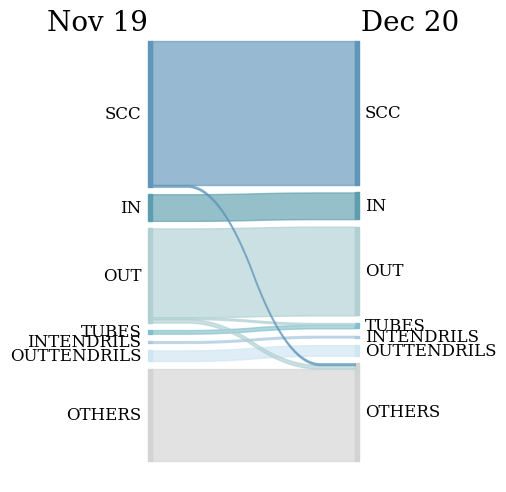

In [85]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#6096ba",
    "IN": "#5c9ead",
    "OUT": "#b0d0d3",
    "TUBES": "#82c0cc",
    "INTENDRILS": "#accbe1",
    "OUTTENDRILS": "#cee5f2",
    "OTHERS": "lightgrey"
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    df[0], df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/role_within_pro'
)
plt.title('Nov 19                        Dec 20', fontsize = 20, y = 0.96)
plt.show() # to display

- **Neutral**

In [89]:
cpd_dict_neutral = {k: cpd_dict[k] for k in index[:644]}
df = pd.DataFrame.from_dict(cpd_dict_neutral, orient='index')

In [90]:
check_component(cpd_dict_neutral)

{'OTHERS', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'TUBES', 'OUT'}
{'OTHERS', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'TUBES', 'OUT'}


In [91]:
check_consistency(cpd_dict_neutral)

0.968944099378882


In [92]:
role_list1 = np.array(list(cpd_dict_neutral.values()))[:,0]
component_percentage(role_list1)

array([0.17857143, 0.02173913, 0.21118012, 0.0015528 , 0.00621118,
       0.06521739, 0.51552795, 0.        ])

In [93]:
role_list2 = np.array(list(cpd_dict_neutral.values()))[:,1]
component_percentage(role_list2)

array([0.16770186, 0.02329193, 0.20807453, 0.0015528 , 0.01242236,
       0.0621118 , 0.52484472, 0.        ])

 The following arguments are deprecated and should be removed: figureName in sankey()


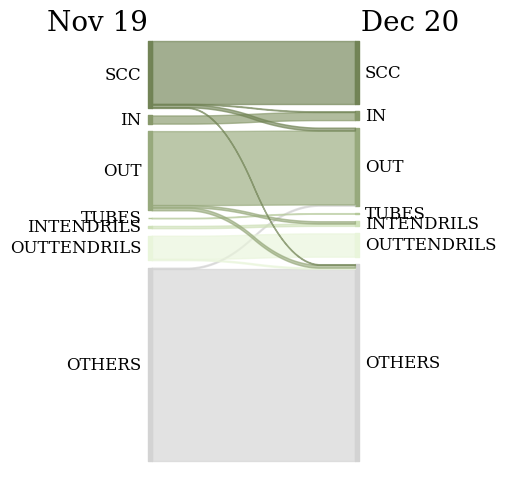

In [94]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#718355",
    "IN": "#87986a",
    "OUT": "#97a97c",
    "TUBES": "#b5c99a",
    "INTENDRILS": "#cfe1b9",
    "OUTTENDRILS": "#e9f5db",
    "OTHERS": "lightgrey"
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    df[0], df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/role_within_neutral'
)
plt.title('Nov 19                        Dec 20', fontsize = 20, y = 0.96)
plt.show() # to display

## 2.2. Across-group

In [95]:
S_across1, IN_across1, OUT_across1, TUBES_across1, INTENDRILS_across1, OUTENDRILS_across1, OTHER_across1, unassigned1 = get_bowtie_role(G1, 'across_role')
S_across2, IN_across2, OUT_across2, TUBES_across2, INTENDRILS_across2, OUTENDRILS_across2, OTHER_across2, unassigned2 = get_bowtie_role(G2, 'across_role')

In [96]:
dict1 = {}
counter = 0; v_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']
for key_list in S_across1 , IN_across1 , OUT_across1 , TUBES_across1 , INTENDRILS_across1 , OUTENDRILS_across1 , OTHER_across1 , unassigned1:
    update_dict = dict(zip(key_list, [v_list[counter]]*len(key_list)))
    dict1 = merge_two_dicts(dict1, update_dict)
    counter += 1

In [97]:
dict2 = {}
counter = 0; v_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']
for key_list in S_across2 , IN_across2 , OUT_across2 , TUBES_across2 , INTENDRILS_across2 , OUTENDRILS_across2 , OTHER_across2 , unassigned2:
    update_dict = dict(zip(key_list, [v_list[counter]]*len(key_list)))
    dict2 = merge_two_dicts(dict2, update_dict)
    counter += 1

In [98]:
cpd_dict = {}; counter = 0
for node in G1.nodes:
    cpd_dict.update({counter: [dict1[node], dict2[node]]})
    counter += 1

In [99]:
def component_percentage(role_list):
    name_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']
    count = []
    for name in name_list:
        count.append((role_list == name).sum())
        
    count = np.array(count)
    percentage = count / np.sum(count)
    return percentage

- **AntiVax**

In [100]:
cpd_dict_anti = {k: cpd_dict[k] for k in index[644:(501+644)]}
df = pd.DataFrame.from_dict(cpd_dict_anti, orient='index')

In [101]:
check_component(cpd_dict_anti)

{'OTHERS', 'UNASSIGNED', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'TUBES', 'OUT'}
{'OTHERS', 'UNASSIGNED', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'TUBES', 'OUT'}


In [102]:
check_consistency(cpd_dict_anti)

0.9101796407185628


In [103]:
role_list1 = np.array(list(cpd_dict_anti.values()))[:,0]
component_percentage(role_list1)

array([0.3253493 , 0.10578842, 0.28942116, 0.00598802, 0.04790419,
       0.03393214, 0.01596806, 0.1756487 ])

In [104]:
role_list2 = np.array(list(cpd_dict_anti.values()))[:,1]
component_percentage(role_list2)

array([0.31736527, 0.11976048, 0.25948104, 0.00399202, 0.0499002 ,
       0.03193613, 0.01596806, 0.20159681])

 The following arguments are deprecated and should be removed: figureName in sankey()


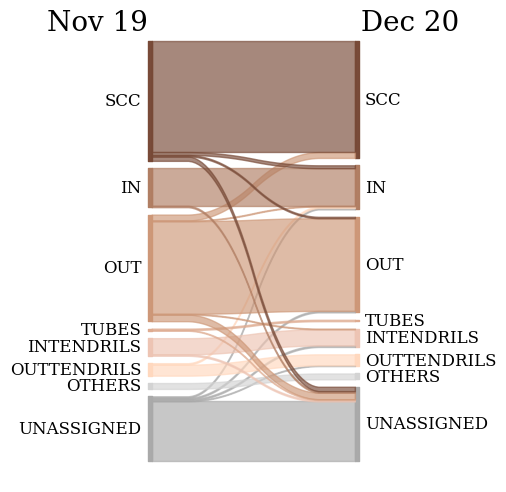

In [106]:
labels1 = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']; labels1.reverse()
labels2 = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']; labels2.reverse()

colors = {
    "SCC": "#774936",
    "IN": "#b07d62",
    "OUT": "#cd9777",
    "TUBES": "#deab90",
    "INTENDRILS": "#edc4b3",
    "OUTTENDRILS": "#ffd8be",
    "OTHERS": "lightgrey",
    "UNASSIGNED": "darkgrey"
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    df[0], df[1], aspect=20, colorDict=colors,
    leftLabels = labels1,
    rightLabels = labels2,
    fontsize = 12,
    figureName = 'Figures/role_across_anti'
)
plt.title('Nov 19                        Dec 20', fontsize = 20, y = 0.96)
plt.show() # to display

- **ProVax**

In [121]:
cpd_dict_pro = {k: cpd_dict[k] for k in index[(644+501):]}
df = pd.DataFrame.from_dict(cpd_dict_pro, orient='index')

In [122]:
check_component(cpd_dict_pro)

{'OTHERS', 'UNASSIGNED', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'OUT'}
{'OTHERS', 'UNASSIGNED', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'OUT'}


In [123]:
check_consistency(cpd_dict_pro)

0.9383886255924171


In [124]:
role_list1 = np.array(list(cpd_dict_pro.values()))[:,0]
component_percentage(role_list1)

array([0.42654028, 0.14691943, 0.17535545, 0.        , 0.00947867,
       0.04739336, 0.01895735, 0.17535545])

In [125]:
role_list2 = np.array(list(cpd_dict_pro.values()))[:,1]
component_percentage(role_list2)

array([0.42180095, 0.14218009, 0.18483412, 0.        , 0.01421801,
       0.06635071, 0.01895735, 0.15165877])

 The following arguments are deprecated and should be removed: figureName in sankey()


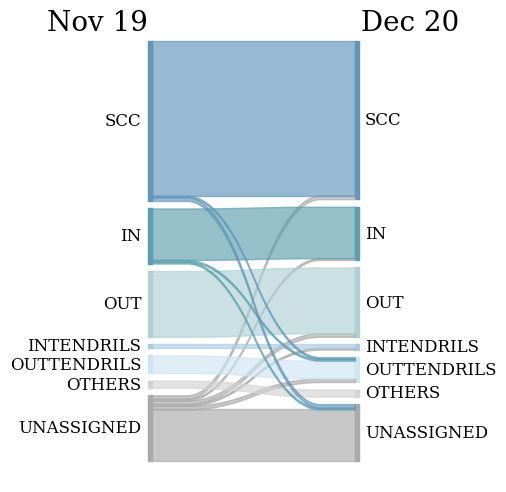

In [126]:
labels1 = ['SCC', 'IN', 'OUT', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']; labels1.reverse()
labels2 = ['SCC', 'IN', 'OUT', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']; labels2.reverse()

colors = {
    "SCC": "#6096ba",
    "IN": "#5c9ead",
    "OUT": "#b0d0d3",
    #"TUBES": "#b5c99a",
    "INTENDRILS": "#accbe1",
    "OUTTENDRILS": "#cee5f2",
    "OTHERS": "lightgrey",
    "UNASSIGNED": "darkgrey"
    
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    df[0], df[1], aspect=20, colorDict=colors,
    leftLabels = labels1,
    rightLabels = labels2,
    fontsize = 12,
    figureName = 'Figures/role_across_pro.png'
)
plt.title('Nov 19                        Dec 20', fontsize = 20, y = 0.96)
plt.show() # to display

- **Neutral**

In [127]:
cpd_dict_neu = {k: cpd_dict[k] for k in index[:644]}
df = pd.DataFrame.from_dict(cpd_dict_neutral, orient='index')

In [128]:
check_component(cpd_dict_neu)

{'OTHERS', 'UNASSIGNED', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'OUT'}
{'OTHERS', 'UNASSIGNED', 'IN', 'OUTTENDRILS', 'INTENDRILS', 'SCC', 'OUT'}


In [129]:
check_consistency(cpd_dict_neu)

0.9456521739130435


In [130]:
role_list1 = np.array(list(cpd_dict_neu.values()))[:,0]
component_percentage(role_list1)

array([0.29192547, 0.1257764 , 0.22826087, 0.        , 0.02950311,
       0.0621118 , 0.05590062, 0.20652174])

In [131]:
role_list2 = np.array(list(cpd_dict_neu.values()))[:,1]
component_percentage(role_list2)


array([0.28571429, 0.12732919, 0.22981366, 0.        , 0.02950311,
       0.06832298, 0.05124224, 0.20807453])

 The following arguments are deprecated and should be removed: figureName in sankey()


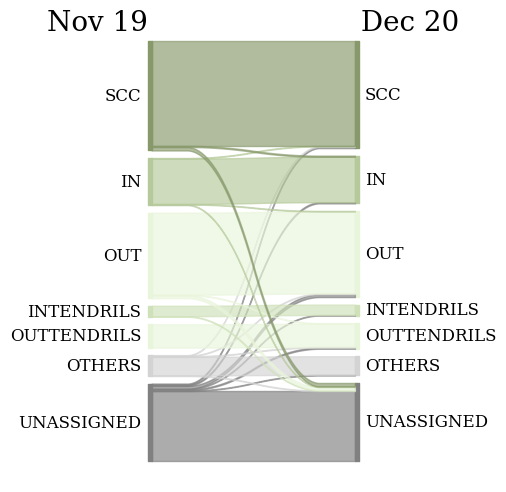

In [133]:
labels1 = ['SCC', 'IN', 'OUT', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']; labels1.reverse()
labels2 = ['SCC', 'IN', 'OUT', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS', 'UNASSIGNED']; labels2.reverse()

colors = {
    "SCC": "#87986a",
    "IN": "#b5c99a",
    "OUT": "#e9f5db",
    "TUBES": "#b5c99a",
    "INTENDRILS": "#cfe1b9",
    "OUTTENDRILS": "#e9f5db",
    "OTHERS": "lightgrey",
    "UNASSIGNED": "grey"
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    df[0], df[1], aspect=20, colorDict=colors,
    leftLabels = labels1,
    rightLabels = labels2,
    fontsize = 12,
    figureName = 'Figures/role_across_neutral'
)
plt.title('Nov 19                        Dec 20', fontsize = 20, y = 0.96)
plt.show() # to display